# Week 9 - Multivariate Analysis, part 2

# 1. Lesson - no lesson this week

In [ ]:
# =============================
# Useful Imports
# =============================

# Standard Libraries
import os
import time
import math
import io
import zipfile
import requests
from urllib.parse import urlparse
from itertools import chain, combinations

# Data Science Libraries
import numpy as np
import pandas as pd
import seaborn as sns

# Visualization
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.ticker as mticker  # Optional: Format y-axis labels as dollars

# Scikit-learn (Machine Learning)
from sklearn.model_selection import (
    train_test_split, 
    cross_val_score, 
    GridSearchCV, 
    RandomizedSearchCV, 
    RepeatedKFold
)
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SequentialFeatureSelector, f_regression, SelectKBest
from sklearn.datasets import make_regression
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor

# Kaggle and Progress Tracking
import kagglehub
from tqdm import tqdm

# =============================
# Global Variables
# =============================
random_state = 42

# =============================
# Utility Functions
# =============================

# Format y-axis labels as dollars with commas (optional)
def dollar_format(x, pos):
    return f'${x:,.0f}'

# Convert seconds to HH:MM:SS format
def format_hms(seconds):
    return time.strftime("%H:%M:%S", time.gmtime(seconds))



# 2. Weekly graph question

The graph below plots the first two principal component scores in a scatter plot.  
- What can be said about the three outliers in the upper left corner of the graph? 
- Is their first principal component score high or low?  
- What about their second principal component score?  
- What does that mean about their values in series_1, series_2, and series_3?  
- It seems to me that you can say something about series_3 (what can you say?) but you may have a harder time saying something about series_1 and series_2, and an almost impossible time saying anything about the relative values of series_1 and series_2.  Why is that?  

- How are series_1 and series_2 related, according to how they were created?  
- If you like, try drawing a pairplot for all three series and see what you get.

Overall, what are the advantages and disadvantages of the graph below?  Does it show anything interesting?

Explained Varience Ratio: [0.79916477 0.18990532 0.01092991] 

Principle Components
     series_1  series_2  series_3
PC1  0.265415  0.300962  0.915957
PC2  0.603376  0.689142 -0.401275
PC3  0.751993 -0.659170 -0.001315


Text(0, 0.5, 'Second Principal Component Score')

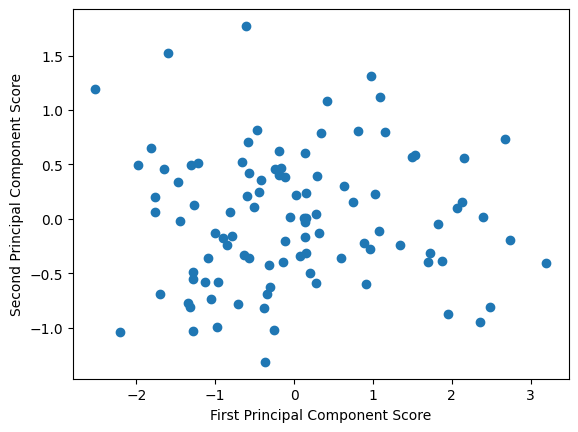

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import decomposition
import matplotlib.pyplot as plt
from sklearn.linear_model    import LogisticRegression


np.random.seed(0)
num_points = 100
series_1 = np.random.normal(loc = 2, scale = 0.5, size = num_points)
series_2 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.1, size = num_points))
series_3 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.5, size = num_points))
df1 = pd.DataFrame({'ser1': series_1, 'ser2': series_2, 'ser3': series_3})
df = df1 - df1.mean() # set mean to zero, so we don't have to subtract mean from the principal component scores

pca3 = decomposition.PCA(n_components = 3)
pca3.fit(df)

df_1 = pd.DataFrame(pca3.components_, columns=['series_1', 'series_2', 'series_3'], index=['PC1', 'PC2', 'PC3'])

print(f"Explained Varience Ratio: {pca3.explained_variance_ratio_} \n")

print(f"Principle Components")
print(df_1)

first_principal_component_score = df.dot(pca3.components_[0])
second_principal_component_score = df.dot(pca3.components_[1])
plt.scatter(first_principal_component_score, 
            second_principal_component_score
            )
plt.xlabel("First Principal Component Score")
plt.ylabel("Second Principal Component Score")

#### **Answer**


**What can be said about the three outliers**

What is interesting about these outliers is that: 
 1. They have a strong negative relationship with the first PCA axis which means that they are going in the opposite direction of the main source of varience in the dataset. 
 2. They are really positive in the second PCA axis which means that they extend very far in the second most prominent direction of varience within the dataset. But their relative magnitude in this direction makes them an outlier here as well. 

**Is their first and second principle component high or low?**

So to reiterate, their first principal component score is really low (negative) and their second principle component is really large. 

**What does this mean about their values in series 1, 2, and 3?**

In terms of what these relative values in series 1, 2, and 3, PC1 is dominated by series 3 but weakly correlated with series 1 and 2 -- so a strongly negative score for these outliers in PC1 would mean that they likely have strong negative values in series 3. 

PC2 is somewhat correlated to series 1 and 2 equally, (with similar magnitudes being in the 0.6 - 0.7 range) so with the extremely strong value that these datapoints have in PC2, I would assume that they likely have stong positive values in both series 1 and series 2. 

Additionally, series 3 has a negative contribution to PC2, so a strongly positive PC2 score would likely mean that there is a lower value in series 3 -- this largely corroborates our intuitions about this relationship from PC1


**It seems to me that you can say something about series_3 (what can you say?) but you may have a harder time saying something about series_1 and series_2, and an almost impossible time saying anything about the relative values of series_1 and series_2.  Why is that?**

Yes, underneath the explained varience ratio above, you can see the principle components and the individual contributions of each of the different series in each of those components. Modeled here as well: 

Principle Components:
     series_1  series_2  series_3
PC1  0.265415  0.300962  0.915957
PC2  0.603376  0.689142 -0.401275
PC3  0.751993 -0.659170 -0.001315

From this table, it’s clear that series_3 contributes very strongly to PC1, and also has a consistent negative loading on PC2. Since PC1 and PC2 together explain nearly 99% of the variance in the dataset, we can be confident that series_3 is strongly represented in the PCA plot, regardless of sign or direction.

In contrast, series_1 and series_2 have much smaller loadings in PC1, which explains about 80% of the variance, so their influence there is limited. They do contribute more significantly to PC2 (around 0.6–0.7), which captures about 19% of the variance. However, even then, their impact is not as dominant as series_3’s impact on PC1.

While PC3 shows stronger loadings for series_1 and series_2, it accounts for only ~1% of the total variance, meaning it doesn’t play a meaningful role in representing the data’s overall structure. Therefore, we shouldn’t expect series_1 and series_2 to stand out as clearly in the PCA plot as series_3.



**How are series_1 and series_2 related, according to how they were created?**

From the code of how series 1 and series 2 were created we can see: 

- series_1 = np.random.normal(loc = 2, scale = 0.5, size = num_points)
- series_2 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.1, size = num_points))

So series 2 is essentially series 1 + noise. As they relate to PCA, this will essentially mean two things -- they'll be correlated, and they'll be going in the same direction, PCA wise. 

**If you like, try drawing a pairplot for all three series and see what you get.**

[plotted below]

**Overall, what are the advantages and disadvantages of the graph for part 1?  Does it show anything interesting?**


The advantage of the graph in Part 1 is that it shows the main directions of variance and highlights any outliers in the dataset — especially in this case, where Principal Components 1 and 2 together capture 99% of the total variance.
However, it also has some drawbacks. Plotting the principal components introduces a layer of abstraction away from the original variables. As we saw with series_1 and series_2, it can be difficult to reconstruct or interpret their original relationships just by looking at the PCA plot.


In [3]:
df1

,ser1,ser2,ser3
0,2.882026,3.424755,2.350030
1,2.200079,1.903561,1.936752
2,2.489369,2.173098,3.858098
3,3.120447,3.422942,4.142804
4,2.933779,2.589611,3.872781
...,...,...,...
95,2.353287,2.312917,3.691002
96,2.005250,2.160013,2.103232
97,2.892935,3.131170,3.736159
98,2.063456,2.509830,1.651333


Text(0, 0.5, 'Third Principal Component Score')

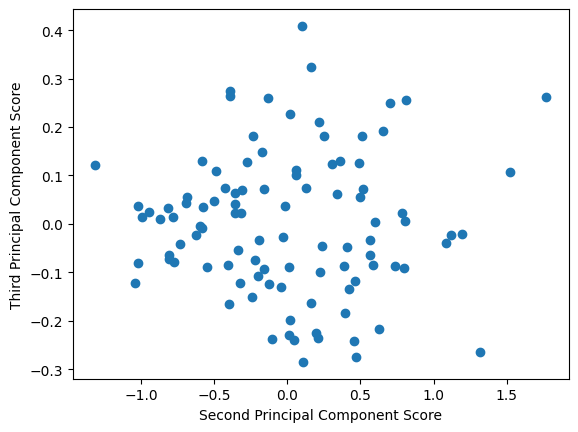

In [4]:
first_principal_component_score = df.dot(pca3.components_[0])
second_principal_component_score = df.dot(pca3.components_[1])
third_principal_component_score = df.dot(pca3.components_[2])


plt.scatter(second_principal_component_score, 
            third_principal_component_score
            )
plt.xlabel("Second Principal Component Score")
plt.ylabel("Third Principal Component Score")

Text(0, 0.5, 'Third Principal Component Score')

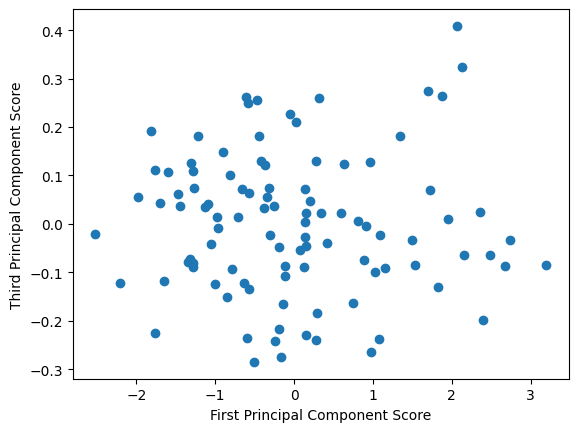

In [5]:
first_principal_component_score = df.dot(pca3.components_[0])
second_principal_component_score = df.dot(pca3.components_[1])
third_principal_component_score = df.dot(pca3.components_[2])


plt.scatter(first_principal_component_score, 
            third_principal_component_score
            )
plt.xlabel("First Principal Component Score")
plt.ylabel("Third Principal Component Score")

___

# 3. Working on your datasets

#### **This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.**

Here are some types of analysis you can do:

- Draw heatmaps.
- Draw bubble plots.
- Perform Principal Component Analysis to find out the directions in which the data varies.  
- Try performing linear regression analysis using different sets of features.
  - Try using your correlation information from previous weeks to help choose features for linear regression.



#### **Note: For brevity here, this analysis will consist of a multivariate analysis of the NFL First and Future dataset. The Multivariate analyses of the other two datasets were combined with their Random forest analyses and submitted as seperate jupyter notebooks for the final milestone.**

____

## **Pre-Plot Processing**

Import the datasets

In [6]:
fnfallplays = pd.read_csv("/Users/leemcfarling/Desktop/FNF_All_Plays.csv")
fnfallplays

,PlayKey,BodyPart,Surface,InjuryLength,PlayerKey,PlayerDay,PlayerGame,StadiumType,FieldType,Temperature,...,PlayerGamePlay,Position,PositionGroup,x,y,direction,speed,distance,time,Inj_Occured
0,26624-1-1,NaN,NaN,NaN,26624,1,1,Outdoors,Synthetic,63,...,1,QB,QuarterBack,87.665753,28.221104,186.148361,0.535753,0.056288,14.90,0
1,26624-1-2,NaN,NaN,NaN,26624,1,1,Outdoors,Synthetic,63,...,2,QB,QuarterBack,86.616462,29.144077,211.949423,0.849692,0.090077,12.95,0
2,26624-1-3,NaN,NaN,NaN,26624,1,1,Outdoors,Synthetic,63,...,3,QB,QuarterBack,79.677264,28.900203,194.134122,0.331014,0.036081,14.75,0
3,26624-1-4,NaN,NaN,NaN,26624,1,1,Outdoors,Synthetic,63,...,4,QB,QuarterBack,72.469449,26.680157,163.762205,0.523701,0.054016,6.30,0
4,26624-1-5,NaN,NaN,NaN,26624,1,1,Outdoors,Synthetic,63,...,5,QB,QuarterBack,65.407846,24.865577,222.120577,0.970385,0.099769,12.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267001,47888-13-51,NaN,NaN,NaN,47888,99,13,Outdoors,Synthetic,33,...,51,DB,DefensiveBack,41.700296,18.853989,155.077709,1.229191,0.124582,18.50,0
267002,47888-13-52,NaN,NaN,NaN,47888,99,13,Outdoors,Synthetic,33,...,52,DB,DefensiveBack,53.980678,18.102780,169.963559,1.796203,0.180780,14.70,0
267003,47888-13-53,NaN,NaN,NaN,47888,99,13,Outdoors,Synthetic,33,...,53,DB,DefensiveBack,57.170638,10.130479,181.141330,1.806649,0.182394,9.35,0
267004,47888-13-54,NaN,NaN,NaN,47888,99,13,Outdoors,Synthetic,33,...,54,DB,DefensiveBack,54.662095,18.973687,166.529609,2.147682,0.215279,17.85,0


Injury Length is a Categorical Variable at the moment -- let's map this to an ordinal categorical variable with the Injury Length being the minimum amount of days an athlete was out for:

In [7]:
# ==========================================
# Remap Injury Length to ordinal Categories
# ------------------------------------------
# if injury == 1+ days then 1, 
# if injury == 42+ days then 42, etc. 
# if NO injury then 0 
# ==========================================

injury_mapping =  {"1+": 1, "7+" : 7, "28+": 28, "42+": 42}
fnfallplays['InjuryLength'] = fnfallplays['InjuryLength'].map(injury_mapping).fillna(0).astype(int)

And now let's do some dataframe filtering: 
- Separate out 'injury' from 'non-injury' plays (injuries are an outlier)
- Serparate out the 'categorical' from 'numeric' datatypes. 

In [8]:
# Numeric Columns
numeric_cols = fnfallplays.select_dtypes(include='number').columns
filtered_cols = [col for col in numeric_cols if 'id' not in col.lower()] # Filter OUT 'id' columns
df_numeric = fnfallplays[filtered_cols]

# Injury Plays Numeric
injury_plays_numeric = df_numeric[df_numeric['Inj_Occured'] == 1]


# Categorical 'all plays'
df_categorical_cols = fnfallplays.select_dtypes(exclude=['number']).columns
df_categorical = fnfallplays[df_categorical_cols]

# Categorical 'injury plays'
pre_categorical_injury_filtering = fnfallplays[fnfallplays['Inj_Occured'] == 1]
injury_plays_categorical_cols = pre_categorical_injury_filtering.select_dtypes(exclude=['number']).columns
injury_plays_categorical = pd.concat(
    [pre_categorical_injury_filtering[injury_plays_categorical_cols], 
     pre_categorical_injury_filtering[['InjuryLength']]], 
    axis=1
)


In [9]:
df_numeric

,InjuryLength,PlayerKey,PlayerDay,PlayerGame,Temperature,PlayerGamePlay,x,y,direction,speed,distance,time,Inj_Occured
0,0,26624,1,1,63,1,87.665753,28.221104,186.148361,0.535753,0.056288,14.90,0
1,0,26624,1,1,63,2,86.616462,29.144077,211.949423,0.849692,0.090077,12.95,0
2,0,26624,1,1,63,3,79.677264,28.900203,194.134122,0.331014,0.036081,14.75,0
3,0,26624,1,1,63,4,72.469449,26.680157,163.762205,0.523701,0.054016,6.30,0
4,0,26624,1,1,63,5,65.407846,24.865577,222.120577,0.970385,0.099769,12.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
267001,0,47888,99,13,33,51,41.700296,18.853989,155.077709,1.229191,0.124582,18.50,0
267002,0,47888,99,13,33,52,53.980678,18.102780,169.963559,1.796203,0.180780,14.70,0
267003,0,47888,99,13,33,53,57.170638,10.130479,181.141330,1.806649,0.182394,9.35,0
267004,0,47888,99,13,33,54,54.662095,18.973687,166.529609,2.147682,0.215279,17.85,0


## **Heatmaps**

**Heatmap Introduction** 

For this analysis, we will be working off of the injury only 'injury_plays_categorical' subset as doing any type of aggregation on the larger dataset will only count the number of plays of each type instead of drilling into the injury data that we're interested in. 

In [10]:
injury_plays_categorical.head(5)

,PlayKey,BodyPart,Surface,StadiumType,FieldType,Weather,PlayType,Position,PositionGroup,InjuryLength
7261,31070-3-7,Knee,Natural,Outdoors,Natural,Sunny,Rush,RB,RunningBack,42
10986,33337-8-15,Foot,Natural,Outdoors,Natural,Partly Cloudy,Pass,TE,TightEnd,28
12166,33474-19-7,Knee,Natural,Outdoors,Natural,Partly Cloudy,Rush,FS,DefensiveBack,28
17277,34347-5-9,Knee,Natural,Outdoors,Natural,Partly Cloudy,Kickoff,WR,WideReciever,7
18311,35570-15-35,Knee,Natural,Outdoors,Natural,Sunny,Pass,T,OffensiveLine,7


**Make a quick function to standardize and minimize any use of code going forward:** 

In [11]:
def heatmap(pivot):
    sns.heatmap(
        data=pivot,
        annot=True,
        cmap='coolwarm'
    )

#### **PlayType and Position Group Heatmaps**

**Intro:** 

The first type of analysis that we want to do with this is to investigate the effect that Position Type and Play Type have on injuries. Are there certain position types that get injured more than others? If so which ones? And what types of plays do those positions get injured during? Let's find out. 

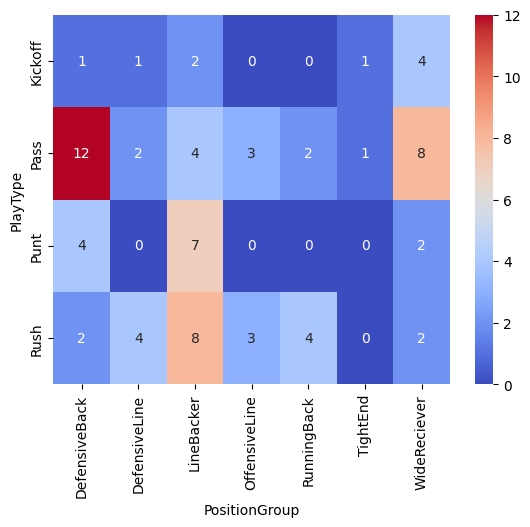

In [50]:
Playtype_Position_Heatmap = pd.crosstab(injury_plays_categorical['PlayType'], injury_plays_categorical['PositionGroup'])
heatmap(Playtype_Position_Heatmap)

At first glance, it appears that Defensive Backs, Linebackers, and Wide Receivers experience the highest number of injuries overall. This makes sense, as these positions are typically involved in the most physical aspects of the game — either delivering hits or taking them. I was surprised, however, that Running Backs did not show a significant spike in injury counts, given that running plays often center around them. This may be due to characteristics or limitations of the dataset.

Looking specifically at passing plays, Defensive Backs and Wide Receivers account for the highest injury counts. This also aligns with expectations, as both positions are highly active during passing plays — on the defensive and offensive sides, respectively. I was particularly interested to see that Defensive Backs had injury counts approximately 50% higher than Wide Receivers. This was surprising, as Defensive Backs are usually delivering hits rather than receiving them.

Additionally, there was a notable number of injuries among Linebackers during both rush and punt plays. Again, this is logical, as Linebackers are typically part of the defensive “rush,” especially during blitz attempts.







Lets drill further into these position types and investigate the relative 'severity' of injuries. 

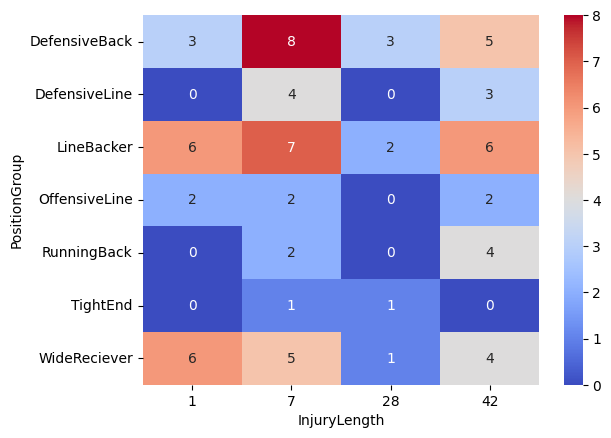

In [51]:
PlayType_Injury = pd.crosstab(injury_plays_categorical['PositionGroup'], injury_plays_categorical['InjuryLength'])
heatmap(PlayType_Injury)

In [52]:
PlayType_Injury

InjuryLength,1,7,28,42
PositionGroup,,,,
DefensiveBack,3,8,3,5
DefensiveLine,0,4,0,3
LineBacker,6,7,2,6
OffensiveLine,2,2,0,2
RunningBack,0,2,0,4
TightEnd,0,1,1,0
WideReciever,6,5,1,4


When we break down injuries by severity, it appears that offensive players — such as Running Backs and Wide Receivers — tend to have a lower incidence of severe injuries (defined here as those lasting 28 days or more, or 42 days or more) compared to their defensive counterparts. Linebackers and Defensive Backs both showed slightly higher counts of injuries lasting 42+ days.

While Wide Receivers had a high overall number of injuries, the majority were relatively mild — most falling into the 1-day or 7-day injury categories. Linebackers, by contrast, experienced more injuries than Wide Receivers in both the 1+ day and 7+ day ranges. Interestingly, although Defensive Backs had relatively few injuries in the 1–6 day range, they had the highest overall count of 7+ day injuries — those that keep an athlete out for between 7 and 27 days.


Let's drill into these positions now and see what specifically was injured for each player. 

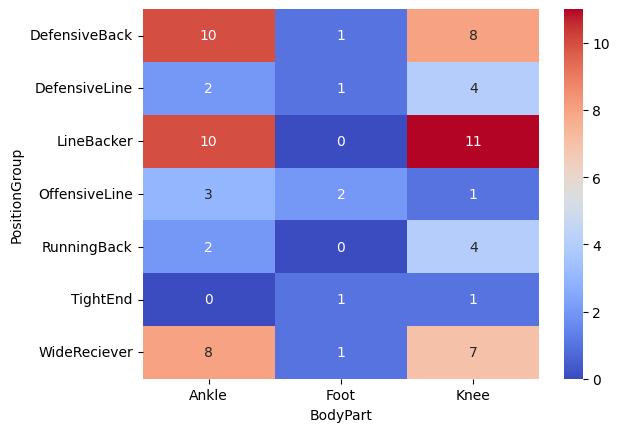

In [14]:
PlayType_Injury = pd.crosstab(injury_plays_categorical['PositionGroup'], injury_plays_categorical['BodyPart'])
heatmap(PlayType_Injury)

When we drill down further, it becomes clear that knee and ankle injuries make up the majority of reported cases. (As a note, this dataset focuses specifically on these types of injuries, so the relative lack of data on other injury types is expected and not a cause for concern.)

Linebackers had the highest number of injuries in both the knee and ankle categories, which aligns with the trends observed earlier. Defensive Backs followed, with Wide Receivers close behind. It would be interesting to explore how these numbers might change if other types of injuries — particularly head injuries — were included in the analysis. This could be a valuable direction for future studies using additional datasets.

#### **Stadium / Field Type Analysis**

The next logical point of inquiry is whether the type of surface and stadium had a significant impact on the injuries sustained. In this analysis, we see that the majority of injuries occurred in outdoor stadiums, which typically feature natural playing surfaces as opposed to artificial turf.

While this difference may appear meaningful at first glance, it’s important to note that most fields in the league are, in fact, outdoor natural surfaces — so the higher injury count may simply reflect that distribution. That said, it’s somewhat reassuring to see that the small number of artificial-surface fields in the league do not appear to be responsible for a disproportionately high number of injuries.

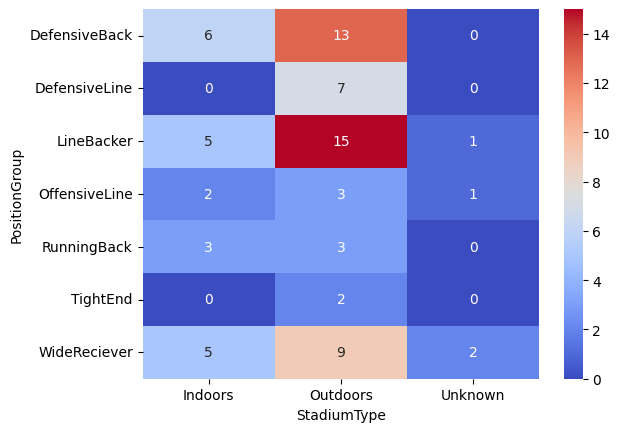

In [15]:
Stadium_Field_Type = pd.crosstab(injury_plays_categorical['PositionGroup'], injury_plays_categorical['StadiumType'])
heatmap(Stadium_Field_Type)

This naturally leads to another question: if most games are played outdoors, is there a significant correlation between weather conditions and the types of injuries sustained?

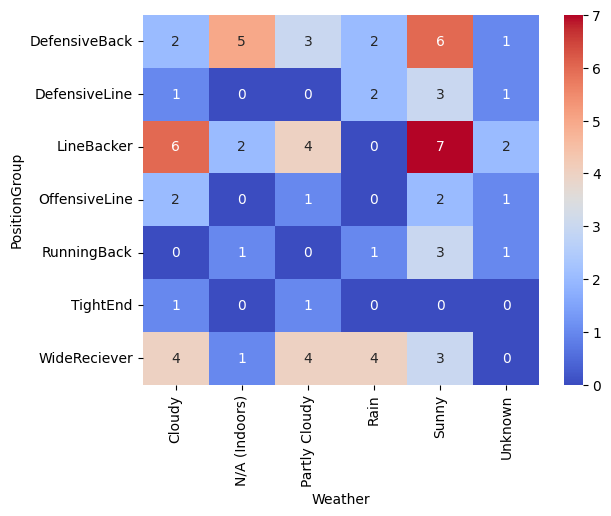

In [16]:
Stadium_Weather = pd.crosstab(injury_plays_categorical['PositionGroup'], injury_plays_categorical['Weather'])
heatmap(Stadium_Weather)

Here, we observe that while the majority of injuries occurred outdoors, most of them took place during either ‘sunny’ or ‘cloudy’ weather conditions. This suggests that weather, in and of itself, may not have a significant impact on injury occurrence -- especially since snowy, rain, and fog were all present in the dataset overall but were either not present here (no injuries in those conditions) or they did not significantly contribute to injury rates. 

___

## **Bubble Plots**

**Intro on Bubble Plots:**

Before diving into the bubble plots, it’s important to note that this type of visualization relies heavily on the presence of meaningful numerical data — particularly variables with statistically significant relationships. As we established in Milestone 3, many of the variables that are significantly correlated with our target variable are categorical in nature, which limits their suitability for this type of analysis.

Given that, the following section focuses primarily on plotting numerical variables that may be correlated with each other, but which have not shown meaningful correlation with injury prevalence or severity. The purpose of this is largely to further demonstrate that these numerical features do not contribute significantly to the overall analysis.



**Bubble Plot Function**

First, let's make a function to call to create the bubble plots so we're not re-writing the same stuff over and over. We want the parameters to be - input dataframe, x, y, size_col

In [17]:
def bubble_plot(data, x, y, size_col, maxbubble=300, ax=None):
    """
    Parameters:
    - data: Input dataFrame
    - x: string name of column for x-axis
    - y: string name of column for y-axis
    - size_col: string name of column for bubble size
    - maxbubble: int, maximum bubble size (default 300)
    """
    size_data = data[size_col]
    min_size = size_data.min()
    max_size = size_data.max()
    epsilon = 1e-6  # avoid div-by-zero

    # Handle edge cases in sizing
    if pd.isna(min_size) or pd.isna(max_size) or max_size == 0:
        size_range = (10, maxbubble)
    else:
        size_range = (max(epsilon, min_size / (max_size + epsilon) * maxbubble), maxbubble)

    # Create new plot if ax is not provided
    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 4))

    sns.scatterplot(
        data=data,
        x=x,
        y=y,
        size=size_col,
        sizes=size_range,
        legend=True,
        alpha=0.7,
        ax=ax
    )
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_title(f"{y} vs {x} (Bubble size = {size_col})")
    return ax

**First, positioning on the field in terms of X and Y**

As a brief introduction to these fields, x and y correspond to positions on the field where an injury occured. The x axis ranges from 0 to 120 to corresponds roughly to which yardline an injury occured at with 0 being the edge of one end-zone and 120 being the edge of another, and likewise with 'y' being sideline to sideline. 

<Axes: title={'center': 'y vs x (Bubble size = InjuryLength)'}, xlabel='x', ylabel='y'>

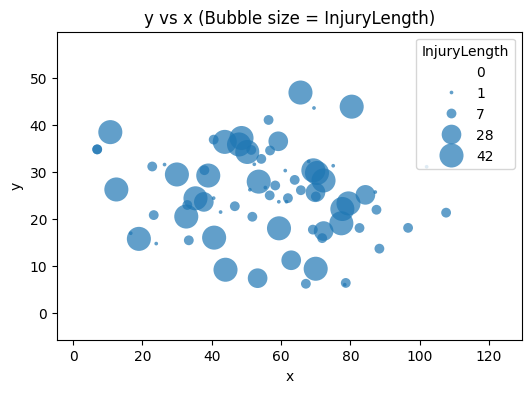

In [18]:
bubble_plot(
    data=df_numeric,
    x='x',
    y='y',
    size_col='InjuryLength'
            )

As was discussed in Milestone 3, there is no significant correlation between the severity of an injury and the location on the field where it occurred. In general, most injuries took place in the middle of the field; however, this pattern mirrors the overall distribution of all plays — injured or not — due to the natural concentration of plays occurring in that area. In other words, the apparent clustering of injuries in the middle of the field reflects the broader class imbalance rather than any meaningful relationship.

<Axes: title={'center': 'PlayerGame vs PlayerGamePlay (Bubble size = InjuryLength)'}, xlabel='PlayerGamePlay', ylabel='PlayerGame'>

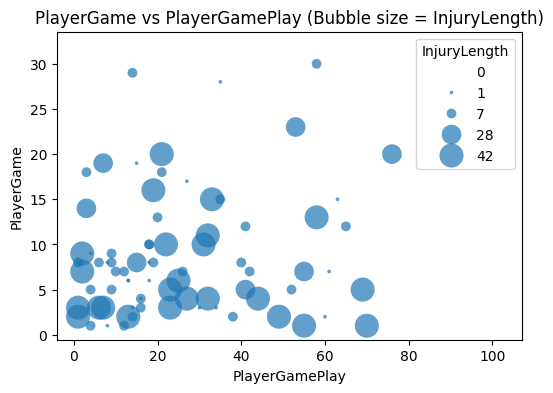

In [19]:
bubble_plot(
    data=df_numeric,
    x='PlayerGamePlay',
    y='PlayerGame',
    size_col='InjuryLength'
            )

Next, playerGamePlay and PlayerGame are both used to track player participation both over the course of a game and over the course of the season respectively. Here, while we can see that injuries (in general) are more likely to occur at the beginning of a season, there is no significant correlation between how long a player has been in a game and teh likelihood of injury. Additionally, there is no significant correlation between the injury severity (in length of injury) and either the time that a particular player has played that season or the amount of plays a player has played in a particular game. 

<Axes: title={'center': 'distance vs speed (Bubble size = InjuryLength)'}, xlabel='speed', ylabel='distance'>

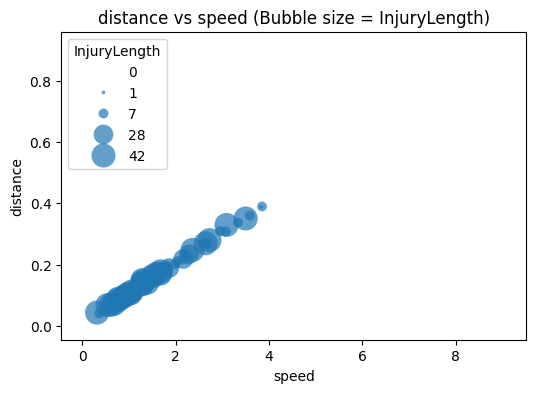

In [20]:
bubble_plot(
    data=df_numeric,
    x='speed',
    y='distance',
    size_col='InjuryLength'
            )

Here, we see that while the speed that a player was able to hit during a play and the relative 'distance' that they were able to achieve during a play were positively correlated, there is no significant correlation between the injury severity and either of these two factors, as the bubble size in this plot is all over the place. 

<Axes: title={'center': 'PlayerGamePlay vs time (Bubble size = InjuryLength)'}, xlabel='time', ylabel='PlayerGamePlay'>

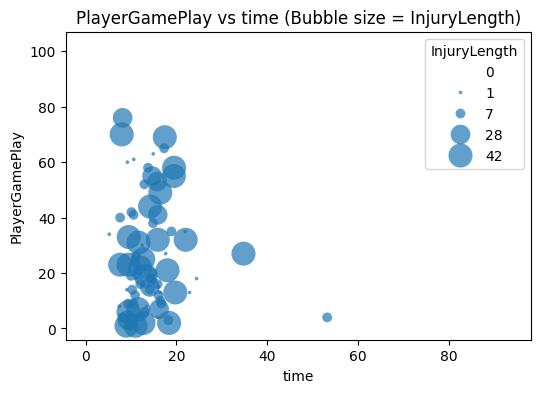

In [21]:
bubble_plot(
    data=df_numeric,
    x='time',
    y='PlayerGamePlay',
    size_col='InjuryLength'
            )

____

Text(0.5, 1.0, 'Avg Injury Length by Position & Type')

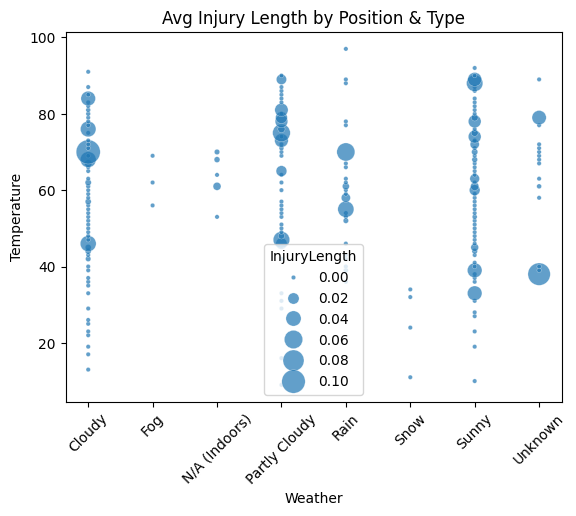

In [22]:
experiment = fnfallplays.copy()
agg = experiment.groupby(['Weather', 'Temperature'])['InjuryLength'].mean().reset_index()

sns.scatterplot(
    data=agg,
    x='Weather',
    y='Temperature',
    size='InjuryLength',
    sizes=(10, 300),
    alpha=0.7
)
plt.xticks(rotation=45)
plt.title("Avg Injury Length by Position & Type")

## **PCA Analysis**

**Quick Note:**

While one-hot encoding and PCA analysis will be undertaken for this dataset, I do not expect it to have a strong effect 

### **PCA Pre-Processing**

In [23]:
pd.set_option('display.max_columns', None)

In [24]:
# First Drop any columns that are redundant or ID columns -- Position is redundant with position group, surface with field type
drop_columns = ['Position', 'PlayerKey', 'PlayKey', 'Surface']

# Categorical Columns (we will one-hot encode these)
categorical_cols = ['BodyPart', 'InjuryLength', 'StadiumType', 'FieldType', 'Weather', 'PlayType', 'PositionGroup']

# Drop Columns
fnf_pre_process = fnfallplays.drop(columns=drop_columns, axis=1)

# Encode Categorical Columns
df_encoded = pd.get_dummies(fnf_pre_process, columns=categorical_cols, drop_first=False)

In [25]:
df_encoded

,PlayerDay,PlayerGame,Temperature,PlayerGamePlay,x,y,direction,speed,distance,time,Inj_Occured,BodyPart_Ankle,BodyPart_Foot,BodyPart_Knee,InjuryLength_0,InjuryLength_1,InjuryLength_7,InjuryLength_28,InjuryLength_42,StadiumType_Indoors,StadiumType_Outdoors,StadiumType_Unknown,FieldType_Natural,FieldType_Synthetic,Weather_Cloudy,Weather_Fog,Weather_N/A (Indoors),Weather_Partly Cloudy,Weather_Rain,Weather_Snow,Weather_Sunny,Weather_Unknown,PlayType_Extra Point,PlayType_Field Goal,PlayType_Kickoff,PlayType_Pass,PlayType_Punt,PlayType_Rush,PlayType_Unknown,PositionGroup_DefensiveBack,PositionGroup_DefensiveLine,PositionGroup_LineBacker,PositionGroup_OffensiveLine,PositionGroup_QuarterBack,PositionGroup_RunningBack,PositionGroup_SpecialTeams,PositionGroup_TightEnd,PositionGroup_Unknown,PositionGroup_WideReciever
0,1,1,63,1,87.665753,28.221104,186.148361,0.535753,0.056288,14.90,0,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False
1,1,1,63,2,86.616462,29.144077,211.949423,0.849692,0.090077,12.95,0,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False
2,1,1,63,3,79.677264,28.900203,194.134122,0.331014,0.036081,14.75,0,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
3,1,1,63,4,72.469449,26.680157,163.762205,0.523701,0.054016,6.30,0,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
4,1,1,63,5,65.407846,24.865577,222.120577,0.970385,0.099769,12.95,0,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267001,99,13,33,51,41.700296,18.853989,155.077709,1.229191,0.124582,18.50,0,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False
267002,99,13,33,52,53.980678,18.102780,169.963559,1.796203,0.180780,14.70,0,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False
267003,99,13,33,53,57.170638,10.130479,181.141330,1.806649,0.182394,9.35,0,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False
267004,99,13,33,54,54.662095,18.973687,166.529609,2.147682,0.215279,17.85,0,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False


Next, I took this from Mod 3 and edited it to see if there are any null values which whill get in the way of PCA. 

In [26]:
def profile_dataset(df):
    # Identify feature types
    feature_types = df.dtypes.apply(lambda x: 'Numeric' if np.issubdtype(x, np.number) else 'Categorical')

    # Build a summary DataFrame
    summary = pd.DataFrame({
        'Feature': df.columns,
        'Type': feature_types.values,
        'Null Values': df.isnull().sum().values,
        'Null %': (df.isnull().mean() * 100).round(2).values,
        'Count (Non-Null)': df.count().values,
        'Unique Values': df.nunique().values
    })

    # Sort Values in Summary by % of null values
    summary = summary.sort_values(by='Null %', ascending=False).reset_index(drop=True)

    # Add dataset shape info above the table
    print(f"This dataset contain {df.shape[0]} rows")
    print(f"This dataset contain {df.shape[1]} columns")

    # Display the summary
    return summary

df_encoded.dropna(subset=['x', 'y', 'direction', 'speed', 'distance', 'time'], inplace=True)
profile_dataset(df_encoded)

This dataset contain 266961 rows
This dataset contain 49 columns


,Feature,Type,Null Values,Null %,Count (Non-Null),Unique Values
0,PlayerDay,Numeric,0,0.0,266961,215
1,Weather_Fog,Categorical,0,0.0,266961,2
2,Weather_Partly Cloudy,Categorical,0,0.0,266961,2
3,Weather_Rain,Categorical,0,0.0,266961,2
4,Weather_Snow,Categorical,0,0.0,266961,2
5,Weather_Sunny,Categorical,0,0.0,266961,2
6,Weather_Unknown,Categorical,0,0.0,266961,2
7,PlayType_Extra Point,Categorical,0,0.0,266961,2
8,PlayType_Field Goal,Categorical,0,0.0,266961,2
9,PlayType_Kickoff,Categorical,0,0.0,266961,2


^ Because there were so few rows compared to the rest of the dataset (45 / > 200,000 ) and none of them were any of the injuries columns

#### **PCA Analysis**

In [27]:
# Initialize PCA (not using n_components in this case)
fnf_pca = decomposition.PCA()
fnf_pca.fit(df_encoded)

# Explained variance
print("Explained Variance Ratio of the First Five Components:")
for i, ratio in enumerate(fnf_pca.explained_variance_ratio_[:5], 1):
    print(f"  Component {i}: {ratio:.4f}")
print()

# Create component matrix (first 5 components only)
pca_columns = df_encoded.columns
pca_index = [f"PC{i+1}" for i in range(len(fnf_pca.components_))]

print("Principal Component Coefficient Matrix (Each row is a component vector): \n")
pc_components = pd.DataFrame(fnf_pca.components_[:5], 
                             columns=pca_columns,
                             index=pca_index[:5])
print(pc_components)
print()

Explained Variance Ratio of the First Five Components:
  Component 1: 0.9309
  Component 2: 0.0321
  Component 3: 0.0158
  Component 4: 0.0106
  Component 5: 0.0077

Principal Component Coefficient Matrix (Each row is a component vector): 

     PlayerDay  PlayerGame  Temperature  PlayerGamePlay         x         y  \
PC1   0.999131    0.040269    -0.010585        0.000431 -0.001639  0.000005   
PC2  -0.000145   -0.000229    -0.000231        0.000540  0.139544 -0.001168   
PC3   0.001654    0.000627     0.001039        0.019185  0.990025  0.003150   
PC4  -0.000757    0.007725     0.002398        0.999669 -0.019096  0.001436   
PC5   0.013988   -0.085064     0.996160       -0.001579 -0.000920  0.000013   

     direction     speed  distance      time   Inj_Occured  BodyPart_Ankle  \
PC1   0.000385 -0.000029 -0.000016 -0.000586 -6.054536e-07   -2.552833e-07   
PC2   0.990215 -0.000244 -0.000024  0.000393  1.100782e-07   -1.639068e-07   
PC3  -0.139523 -0.000043 -0.000004 -0.001214 -2.39

When we run PCA, it looks like PlayerDay is dominating the first principal component. This is suspicious and may indicate that the column is acting as some kind of identifier or pseudo-ID. According to the official documentation, we get the following description:


- The PlayerDay is an integer sequence that provides an accurate timeline for player game participation. In order to generate an accurate timeline of an individual player’s game participation, the PlayerDay variable should be used. The interval between days in the PlayerDay field for an individual player accurately reflects the interval in days between that player’s participation in games. Every player has a PlayerDay = 1 (note that this date is not the same for all players). Some players may have negative values for PlayerDay, which simply indicates participation in a game that occurred before their individually assigned PlayerDay = 1.

So while PlayerDay isn’t technically an ID column, we should still treat it with caution. Let’s plot the histogram again to refresh our understanding of its distribution and possible role.

<Axes: >

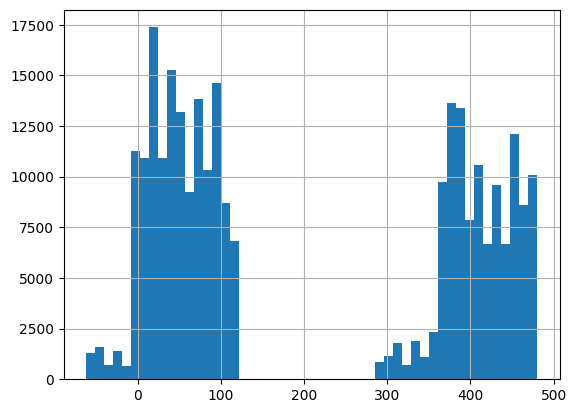

In [28]:
df_encoded["PlayerDay"].hist(bins=50)

Here we can see a noticeable drop-off between the 150 to 275 range. This gap is likely indicative of the offseason, especially considering that the dataset spans multiple years. This discontinuity is probably why PlayerDay is dominating the PCA — the large variance between the two clusters is being picked up as the primary component. Let’s go ahead and drop this column for the PCA analysis. We can always add it back in later as a separate feature in the classification model.


In [29]:
df_drop_playerday = df_encoded.drop(columns='PlayerDay', axis=1)

# Initialize PCA (not using n_components in this case)
fnf_pca1 = decomposition.PCA()
fnf_pca1.fit(df_drop_playerday)

# Explained variance
print("Explained Variance Ratio of the First Five Components:")
for i, ratio in enumerate(fnf_pca1.explained_variance_ratio_[:5], 1):
    print(f"  Component {i}: {ratio:.4f}")
print()

# Create component matrix (first 5 components only)
pca_columns1 = df_drop_playerday.columns
pca_index1 = [f"PC{i+1}" for i in range(len(fnf_pca1.components_))]

print("Principal Component Coefficient Matrix (Each row is a component vector): \n")
pc_components1 = pd.DataFrame(fnf_pca1.components_[:5], 
                             columns=pca_columns1,
                             index=pca_index1[:5])
print(pc_components1)
print()

Explained Variance Ratio of the First Five Components:
  Component 1: 0.4535
  Component 2: 0.2232
  Component 3: 0.1501
  Component 4: 0.1119
  Component 5: 0.0247

Principal Component Coefficient Matrix (Each row is a component vector): 

     PlayerGame  Temperature  PlayerGamePlay         x         y  direction  \
PC1   -0.000046    -0.000297        0.000544  0.139530 -0.001168   0.990217   
PC2   -0.004031     0.003632        0.018964  0.990019  0.003150  -0.139507   
PC3    0.011436    -0.001483        0.999639 -0.018819  0.001437   0.002108   
PC4   -0.167327     0.985762        0.003468 -0.004225  0.000025   0.000875   
PC5    0.985723     0.167400       -0.011030  0.003581 -0.010570  -0.000414   

        speed  distance      time   Inj_Occured  BodyPart_Ankle  \
PC1 -0.000244 -0.000024  0.000390  1.072462e-07   -1.650933e-07   
PC2 -0.000038 -0.000002 -0.001130 -2.322161e-06   -1.106528e-07   
PC3 -0.005210 -0.000522 -0.013347 -2.451055e-06   -7.143763e-07   
PC4 -0.000084  0

**PCA Outlier Analysis**


These results above make a lot more sense. Now let's check for outliers using PCA. Because the first 3 components make up slightly over 80% of the variance, we will plot these against each other to see if we can find any outliers like before. 

Text(0, 0.5, 'Second Principal Component Score')

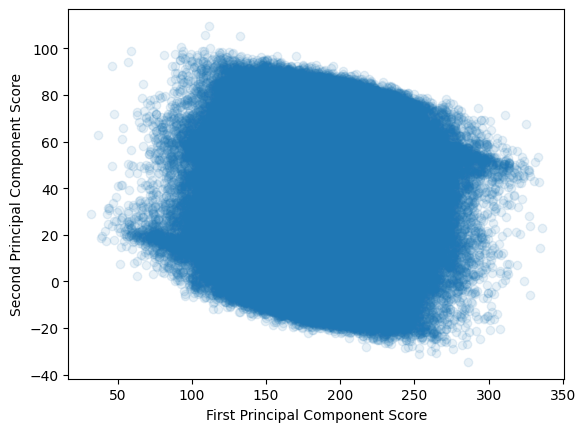

In [30]:
first_principal_component_score1 = df_drop_playerday.dot(fnf_pca1.components_[0])
second_principal_component_score1 = df_drop_playerday.dot(fnf_pca1.components_[1])
third_principal_component_score1 = df_drop_playerday.dot(fnf_pca1.components_[2])


plt.scatter(first_principal_component_score1, 
            second_principal_component_score1, 
            alpha=0.1
            )
plt.xlabel("First Principal Component Score")
plt.ylabel("Second Principal Component Score")

After plotting the first two principal components against each other, we can see that while there are definitely a few likely outliers (in the upper left and lower right quadrants), they likely won’t dominate the analysis as much as the outliers in the Weekly Graph Question above. This is because, although these points are technically outliers, they are still relatively close to the rest of the distribution. Additionally, the dataset we’re pulling from here is much larger — over 200,000 data points compared to just 100 in the earlier example.


Text(0, 0.5, 'Second Principal Component Score')

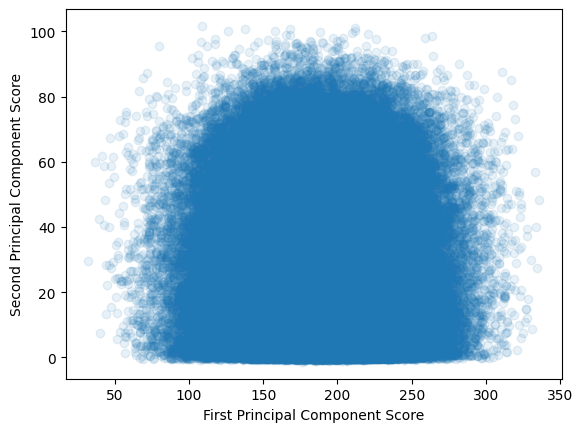

In [31]:
plt.scatter(first_principal_component_score1, 
            third_principal_component_score1, 
            alpha=0.1
            )
plt.xlabel("First Principal Component Score")
plt.ylabel("Second Principal Component Score")

Again, here there is nothing dramatically distant from the main cloud, so this compared with the natural tapering off of density would likely indicate that no significant action is needed in terms of outliers. 

____

## **Feature Selection and (Logistic) Regression**

Quick note before moving forward. I know that the directions said linear regression for this part, but this is technically a classification problem (we are classifying whether an injury occured y/n) so here, I'll just perform a forward and backward feature selection using cross validation here. 

**Pre-Processing**

(We need to drop the target variable and any feature column that is ONLY populated when a player is injured.)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Drop injury-related columns (and optionally PlayerDay)
injury_related_columns = [
    'Inj_Occured',
    'BodyPart_Ankle',
    'BodyPart_Foot',
    'BodyPart_Knee',
    'InjuryLength_0',
    'InjuryLength_1',
    'InjuryLength_7',
    'InjuryLength_28',
    'InjuryLength_42',
    'PlayerDay'  
]

X = df_encoded.drop(columns=injury_related_columns)
y = df_encoded['Inj_Occured']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize before PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit PCA on train only
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

**Forward Feature Selection Base Function**

(Code Obtained from Module 3)

In [33]:
from sklearn.model_selection import cross_val_score

def forward_feature_selection(X, y, model, 
                              scoring='accuracy', 
                              cv=5, 
                              tol=None,
                              max_features=None,
                              n_jobs=-1,
                              verbose=False):
    selected_features = []
    remaining_features = list(X.columns)
    best_scores = []
    previous_score = float('-inf')  # For maximizing
    best_feature_set = None
    best_score = float('-inf')      # For maximizing

    while remaining_features:
        scores = {}
        for feature in remaining_features:
            current_features = selected_features + [feature]
            cv_score = cross_val_score(model, X[current_features], y, 
                                       scoring=scoring, cv=cv, n_jobs=n_jobs).mean()
            scores[feature] = cv_score

        # Select the feature that maximizes the CV score
        best_feature = max(scores, key=scores.get)
        current_score = scores[best_feature]

        # Check for tolerance-based stopping
        if tol is not None and current_score - previous_score < tol:
            if verbose:
                print("Stopping early due to minimal improvement.")
            break

        selected_features.append(best_feature)
        best_scores.append(current_score)
        remaining_features.remove(best_feature)
        previous_score = current_score

        if verbose:
            print(f"\nFeatures: {selected_features[-3:]}, CV Score: {current_score:.4f}")

        # Update the best set if this one is the best so far
        if current_score > best_score:
            best_score = current_score
            best_feature_set = selected_features.copy()

        if max_features is not None and len(selected_features) >= max_features:
            break

    return selected_features, best_scores, best_feature_set, best_score

**Forward Feature Selection**

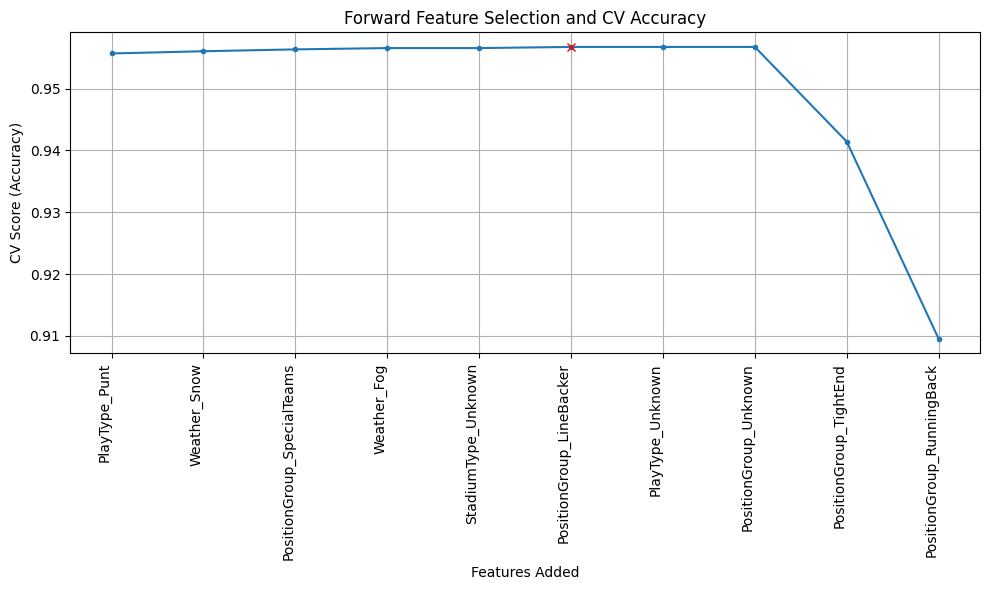

Best Features: ['PlayType_Punt', 'Weather_Snow', 'PositionGroup_SpecialTeams', 'Weather_Fog', 'StadiumType_Unknown', 'PositionGroup_LineBacker']
Best CV Score: 0.9567


In [34]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

# Run Forward Feature Selection using Logistic Regression
selected_features, best_scores, best_feature_set, best_score = forward_feature_selection(
    X_train, 
    y_train, 
    model=LogisticRegression(solver='liblinear', class_weight='balanced', max_iter=1000),
    scoring='accuracy',     
    cv=5,
    max_features=10,
    verbose=False
)

# Safe index lookup
if best_feature_set is not None:
    best_index = selected_features.index(best_feature_set[-1])
else:
    best_index = None
    print("Warning: No best feature set was selected.")

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(best_scores) + 1), best_scores, marker='.')
if best_index is not None:
    plt.plot([best_index + 1], [best_score], marker='x', color='red')
plt.xticks(range(1, len(selected_features) + 1), selected_features, rotation=90, ha='right')
plt.title('Forward Feature Selection and CV Accuracy')
plt.xlabel('Features Added')
plt.ylabel('CV Score (Accuracy)')
plt.grid()
plt.tight_layout()
plt.show()

print(f'Best Features: {best_feature_set}')
print(f'Best CV Score: {best_score:.4f}')

**Backward Feature Selection**



In [35]:
from sklearn.model_selection import cross_val_score
import numpy as np

def backward_feature_selection(X, y, model, 
                               scoring='accuracy', 
                               cv=5, 
                               tol=None,
                               max_features=None,
                               n_jobs=-1,
                               verbose=False):
    
    def cv_score(features):
        return cross_val_score(model, X[features], y, 
                               scoring=scoring, cv=cv, 
                               n_jobs=n_jobs).mean()
    
    features_remaining = list(X.columns)
    initial_score = cv_score(features_remaining)

    best_score = initial_score
    best_feature_set = features_remaining.copy()
    selected_features = ['NONE']   # Order of feature removal
    best_scores = [initial_score]  # Scores after each step

    if verbose:
        print("Start with full set of features:")
        print(f'{features_remaining}  CV score: {np.around(initial_score, 4)}\n')

    target_feature_count = 1 if max_features is None else max_features
    prev_score = initial_score
    round_num = 1

    while len(features_remaining) > target_feature_count:
        if verbose:
            print(f'Round {round_num}:')

        highest_score = float('-inf')
        feature_to_remove = None
        best_new_features = None

        for feature in features_remaining:
            new_feature_set = features_remaining.copy()
            new_feature_set.remove(feature)
            new_score = cv_score(new_feature_set)
            if verbose:
                print(f'Trying removal of: {feature}, CV Score: {np.around(new_score, 4)}')
            if new_score > highest_score:
                highest_score = new_score
                feature_to_remove = feature
                best_new_features = new_feature_set

        if tol is not None and (highest_score - prev_score) < tol:
            if verbose:
                print("\nStopping early due to minimal improvement.")
            break

        if highest_score > best_score:
            best_score = highest_score
            best_feature_set = best_new_features.copy()

        prev_score = highest_score
        features_remaining = best_new_features
        selected_features.append(feature_to_remove)
        best_scores.append(highest_score)

        if verbose:
            print(f'\nRemoved {feature_to_remove}:  CV score: {np.around(highest_score, 4)}\n')
        round_num += 1

    return (
        selected_features,   # Order of feature removals
        best_scores,         # CV scores after each step
        best_feature_set,    # Best performing feature set
        best_score           # Best score observed
    )

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


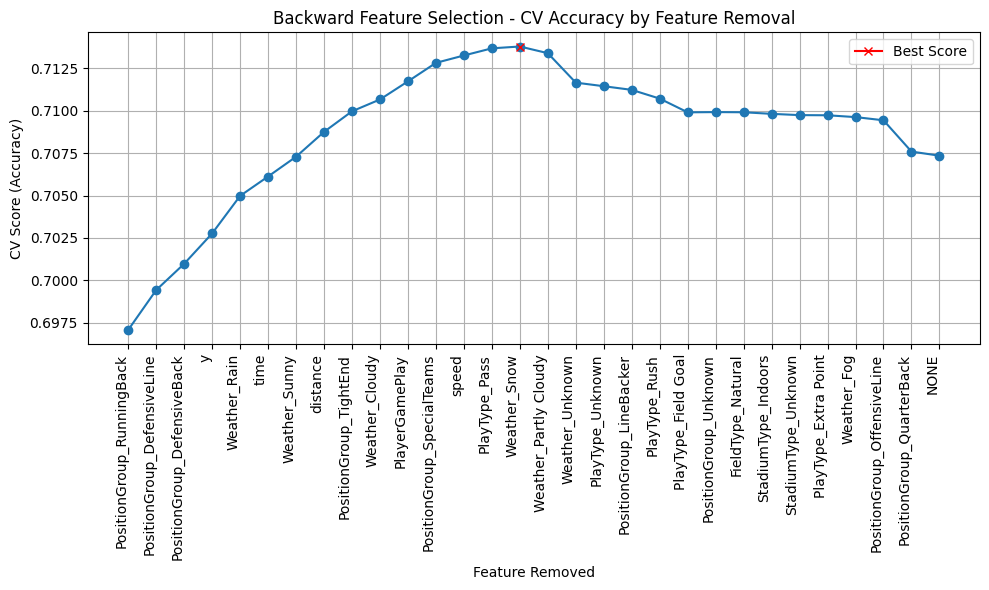

Best Feature Set (after removal): ['PlayerGame', 'Temperature', 'PlayerGamePlay', 'x', 'y', 'direction', 'speed', 'distance', 'time', 'StadiumType_Outdoors', 'FieldType_Synthetic', 'Weather_Cloudy', 'Weather_N/A (Indoors)', 'Weather_Rain', 'Weather_Sunny', 'PlayType_Kickoff', 'PlayType_Pass', 'PlayType_Punt', 'PositionGroup_DefensiveBack', 'PositionGroup_DefensiveLine', 'PositionGroup_RunningBack', 'PositionGroup_SpecialTeams', 'PositionGroup_TightEnd', 'PositionGroup_WideReciever']
Best CV Score: 0.7138


In [36]:
from sklearn.linear_model import LogisticRegression

removed_features, scores, best_feature_set, best_score = backward_feature_selection(
    X_train, 
    y_train, 
    model=LogisticRegression(solver='liblinear', class_weight='balanced', max_iter=1000),
    scoring='accuracy',     # You can change to 'f1' or 'roc_auc'
    cv=5,
    max_features=10,
    verbose=False
)

# Create X-axis range (number of remaining features = decreasing)
num_features = [len(X_train.columns) - i for i in range(len(scores))]

# Get index of best score
best_index = np.argmax(scores)

plt.figure(figsize=(10, 6))
plt.plot(num_features, scores, marker='o')
plt.plot([num_features[best_index]], [scores[best_index]], marker='x', color='red', label='Best Score')
plt.xticks(num_features, removed_features, rotation=90, ha='right')
plt.xlabel('Feature Removed')
plt.ylabel('CV Score (Accuracy)')
plt.title('Backward Feature Selection - CV Accuracy by Feature Removal')
plt.grid()
plt.tight_layout()
plt.legend()
plt.show()

# Print results
print(f'Best Feature Set (after removal): {best_feature_set}')
print(f'Best CV Score: {best_score:.4f}')

____

# **Part 3 Discussion**
**PCA: Can you represent the data using only its projection onto its first principal component, using the methods described in Week 8?**  

When PCA analysis was performed on this dataset, it was found that there was one variable, playerDay that was largely dominating the PCA analysis, with over 90 percent of the varience due to one variable. I concluded that this was artificial because there were some formatting issues with that particular field that was causing it to have an exagerated varience in the PCA analysis, and so it was dropped from the analysis for that reason. When PCA was re-run after this, more reasonable results were obtained, but in all likelihood there will probably have to be some middle ground that is reached between using PCA on the variables and possibly using playerDay as a standalone feature in the classification pipeline. 


**PCA: How much of the variance would this capture?**

Originally, when PlayerDay was used, it comprised over 93% of the varience alone, but when it was dropped the PCA analysis became much more reasonable, namely: 


- Component 1: 45 % of varience
- Component 2: 22 % of varience
- Component 3: 15 % of varience

So in this case, the first three components would explain more than 80% of the varience in the dataset. 

**Lin/Log Reg: Which features seem most likely to be useful to predict other features?**

After running forward and backward feature selection on the dataset, it would seem that the following are the most useful: 

*General Variables*
- 'PlayerGame', 
- 'Temperature', 
- 'PlayerGamePlay', 
- 'x', 
- 'y', 
- 'direction', 
- 'speed', 
- 'distance', 
- 'time', 

*Stadium Types*
- 'StadiumType_Outdoors', 

*Field Types*
- 'FieldType_Synthetic', 


*Weather*
- 'Weather_Cloudy', 
- 'Weather_N/A (Indoors)', 
- 'Weather_Rain', 
- 'Weather_Sunny', 

*Play Types*
- 'PlayType_Kickoff', 
- 'PlayType_Pass', 
- 'PlayType_Punt', 

*Positions*
- 'PositionGroup_DefensiveBack', 
- 'PositionGroup_DefensiveLine', 
- 'PositionGroup_RunningBack', 
- 'PositionGroup_SpecialTeams', 
- 'PositionGroup_TightEnd', 
- 'PositionGroup_WideReciever'


 **Explain what conclusions you would draw from this analysis: are the data what you expect?**

 Some of these are surprising and some are not. I wouldn’t have expected spatial and movement features such as x, y, direction, or speed to play a major role in injury prediction—at least based on initial exploratory analysis. However, their appearance here suggests it’s worth further investigation into whether these variables meaningfully contribute to classification performance. On the other hand, some findings were definitely expected in this analysis. Most of the injusries occured in Outdoor stadiums so that makes sense and the positions, play types, and weather conditions that displayed the most injuries also made an appearence in the feature variable selections. 


**Are the data likely to be usable? If the data are not useable, find some new data!**

Yes. Despite some limitations and preprocessing challenges, the dataset appears usable for classification purposes.

- **Do you see any outliers? (Data points that are far from the rest of the data).**

Yes. Injury occurrence is an outlier by nature—it’s a rare event in the dataset. Therefore, we’ll likely need to apply some resampling techniques (undersampling, oversampling) to address class imbalance and improve prediction accuracy.

- **Does the Principal Component Analysis suggest a way to represent the data using fewer dimensions than usual - using its first one or two principal component scores, perhaps?**

Yes. I believe we can reduce dimensionality using PCA. The first two or three components capture a significant portion of the variance and could serve as input features. At the same time, we may benefit from retaining certain high-impact original variables (like PlayerDay) outside of PCA to achieve better performance.

___

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 136-150 of the Storytelling With Data book as best you can. ("The power of super-categories" to the end of chapter 5). You do not have to get the exact data values right, just the overall look and feel.

**Will be working on recreating the plot from page 148.** 

First, roughly recreate a dataframe that mimics the data in the plot in the book

In [37]:
part4_df = pd.DataFrame({
    'Segment': ['Segment 1', 'Segment 2', 'Segment 3', 'Segment 4', 'Segment 5', 'Segment 6', 'Segment 7'],
    'US Population': [16, 7, 10, 10, 10, 32, 15],
    'Our Customers': [9, 10, 15, 18, 17, 20, 11]
}) 

Then create a long version of the data that has things broken out into percentage, segment and group

In [38]:
df_long = part4_df.melt(id_vars='Segment', var_name='Group', value_name='Value')
df_long['Percentage'] = df_long.groupby('Group')['Value'].transform(lambda x: x / x.sum() * 100)

The roughly recreate the plot in the book -- it's not a 100 percent because the stacked histplot didn't have a built in function for it but it's close

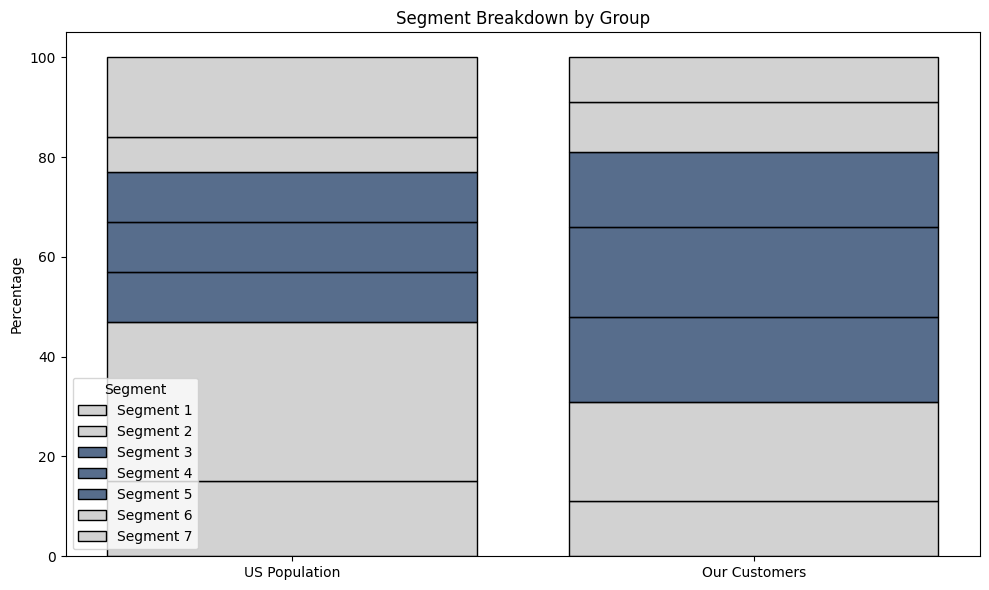

In [39]:
# Set the colors
blue = '#1F3C66'
grey = '#C4C4C4'

palette = {
    'Segment 1': grey,  
    'Segment 2': grey,  
    'Segment 3': blue,  
    'Segment 4': blue,  
    'Segment 5': blue,  
    'Segment 6': grey,  
    'Segment 7': grey   
}

plt.figure(figsize=(10, 6))
sns.histplot(
    data=df_long,
    x='Group',
    weights='Percentage',
    hue='Segment',
    multiple='stack',
    palette=palette,
    shrink=0.8 # (put some padding between the two bars)
)
plt.title("Segment Breakdown by Group")
plt.ylabel("Percentage")
plt.xlabel("")
plt.tight_layout()
plt.show()